In [2]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import pyaldata as pyd
import scipy
from utils import *
import seaborn as sns
from tools import *

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import PCA, FactorAnalysis

import warnings

field sol_nb could not be converted to int.
field sol_nb could not be converted to int.
field sol_nb could not be converted to int.
field sol_nb could not be converted to int.


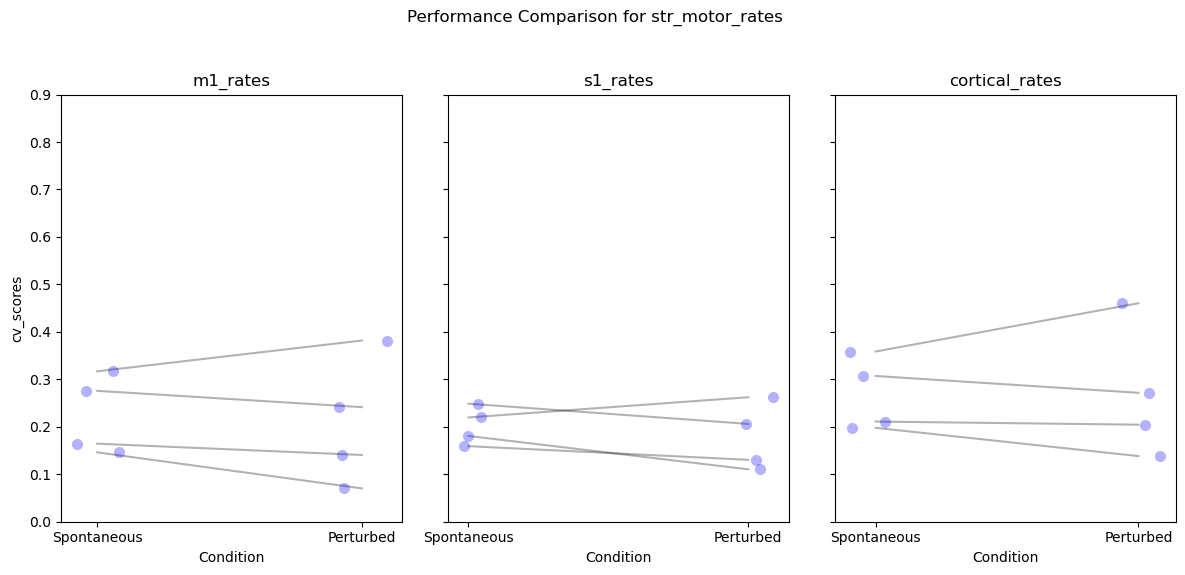

field sol_nb could not be converted to int.
field sol_nb could not be converted to int.
field sol_nb could not be converted to int.
field sol_nb could not be converted to int.


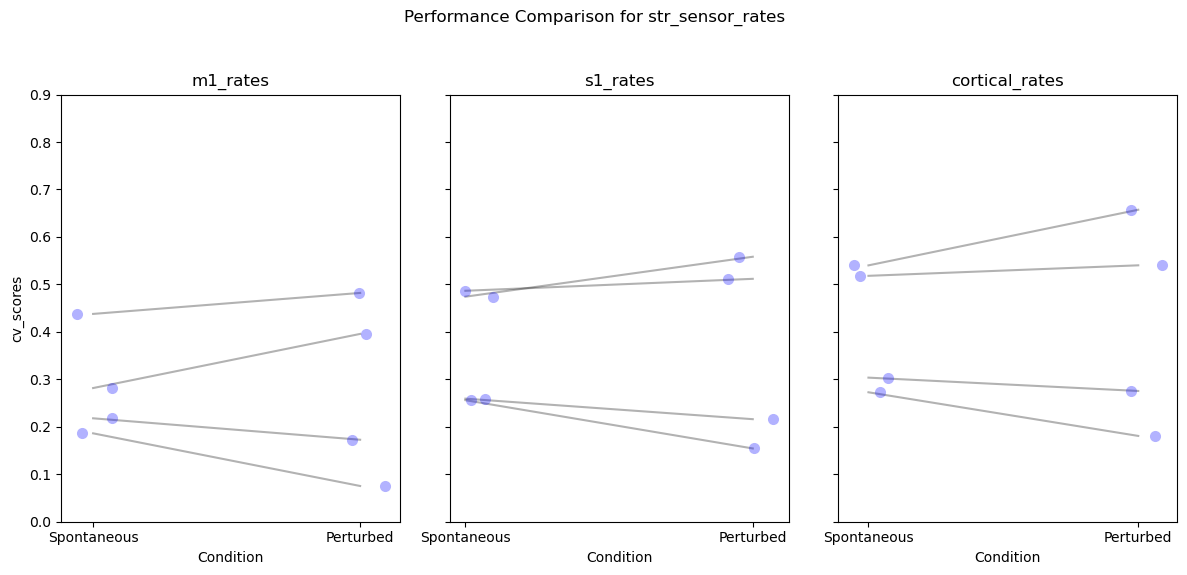

In [3]:
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

list_of_keypoints = ['str_motor_rates', 'str_sensor_rates']

for region in list_of_keypoints:
    # Example input fields
    input_fields = ["m1_rates", "s1_rates", "cortical_rates"]

    # Example dataset and mouse_id pairs
    dataset_mouse_pairs = [
        ('M030_2024_04_11_17_00', 'M030'),
        ('M030_2024_04_12_09_40', 'M030'),
        ('M027_2024_03_20_11_30', 'M027'),
        ('M033_2024_04_11_08_22', 'M033')
    ]

    # Store results
    results = {field: {'Spontaneous': [], 'Perturbed': []} for field in input_fields}
    dataset_indices = {field: {'Spontaneous': [], 'Perturbed': []} for field in input_fields}

    n_lags = 2  # Number of historical steps to include

    for dataset_index, (dataset, mouse_id) in enumerate(dataset_mouse_pairs):
        df = process_data(dataset, mouse_id)
        df_perturbed = df[df['trialType'] == 'perturbation']
        df_spontaneous = df[df['trialType'] == 'spontaneous']
        
        for input_field in input_fields:
            X_perturbed = pyd.concat_trials(df_perturbed, input_field)
            y_perturbed = pyd.concat_trials(df_perturbed, region)
            X_perturbed_lagged = create_lagged_data(X_perturbed, n_lags)
            
            X_spontaneous = pyd.concat_trials(df_spontaneous, input_field)
            y_spontaneous = pyd.concat_trials(df_spontaneous, region)
            X_spontaneous_lagged = create_lagged_data(X_spontaneous, n_lags)
            
            for X, y, label in [(X_perturbed_lagged, y_perturbed, 'Perturbed'), (X_spontaneous_lagged, y_spontaneous, 'Spontaneous')]:
                valid_idx = np.arange(n_lags, len(y))  # Exclude the first `n_lags` samples
                X_valid = X[valid_idx]
                y_valid = y[valid_idx]
                
                cv_scores = cross_val_score(LinearRegression(), X_valid, y_valid, cv=KFold(5, shuffle=True), scoring='r2')
                mean_cv_score = np.mean(cv_scores)
                results[input_field][label].append(mean_cv_score)
                dataset_indices[input_field][label].append(dataset_index)

    # Plot the performance comparison
    fig, axes = plt.subplots(nrows=1, ncols=len(input_fields), figsize=(12, 6), sharey=True)
    axes = axes.flatten()

    for i, input_field in enumerate(input_fields):
        data = pd.DataFrame({
            'cv_scores': results[input_field]['Spontaneous'] + results[input_field]['Perturbed'],
            'Condition': ['Spontaneous'] * len(results[input_field]['Spontaneous']) + ['Perturbed'] * len(results[input_field]['Perturbed']),
            'DatasetIndex': dataset_indices[input_field]['Spontaneous'] + dataset_indices[input_field]['Perturbed']
        })
        sns.stripplot(data=data, x='Condition', y='cv_scores', s=8, alpha=0.3, color='blue', ax=axes[i])
        axes[i].set_title(input_field)
        axes[i].set_ylim([0,0.9])

        # Connect points that belong to the same dataset
        for dataset_index in set(data['DatasetIndex']):
            subset = data[data['DatasetIndex'] == dataset_index]
            if len(subset) == 2:  # Ensure there are both Spontaneous and Perturbed points
                x_coords = [0, 1]  # x-coordinates for 'Spontaneous' and 'Perturbed'
                y_coords = subset['cv_scores'].values
                axes[i].plot(x_coords, y_coords, 'k-', alpha=0.3)

    plt.suptitle(f"Performance Comparison for {region}")
    plt.savefig('./probe_analysis/decode_neural_activity/cortical_to_striatal'+region+'.pdf')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

field sol_nb could not be converted to int.
field sol_nb could not be converted to int.
field sol_nb could not be converted to int.
field sol_nb could not be converted to int.


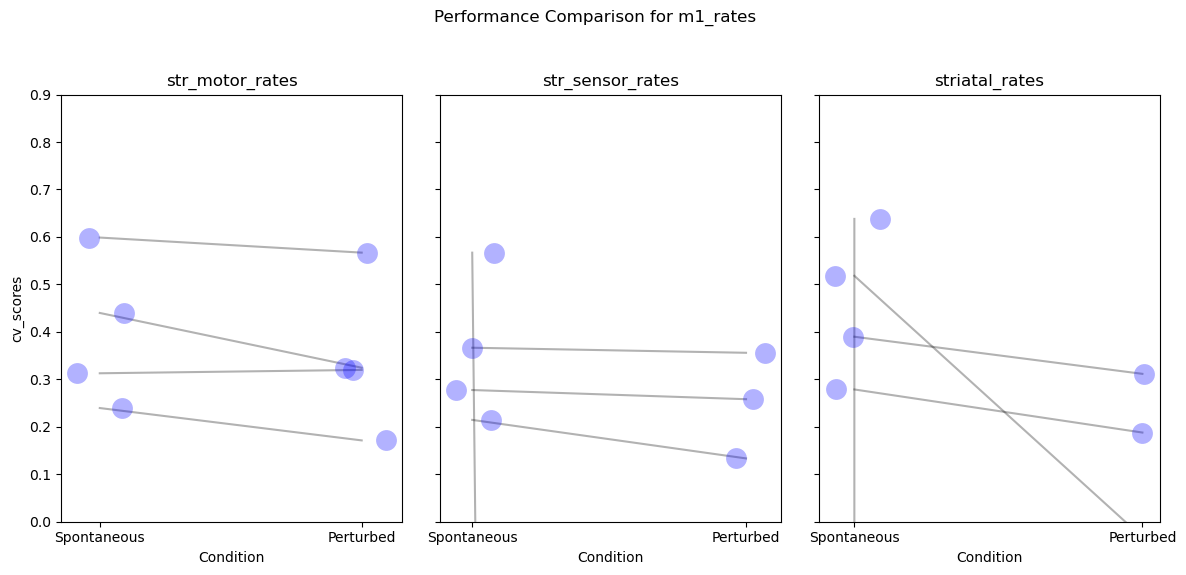

field sol_nb could not be converted to int.
field sol_nb could not be converted to int.
field sol_nb could not be converted to int.
field sol_nb could not be converted to int.


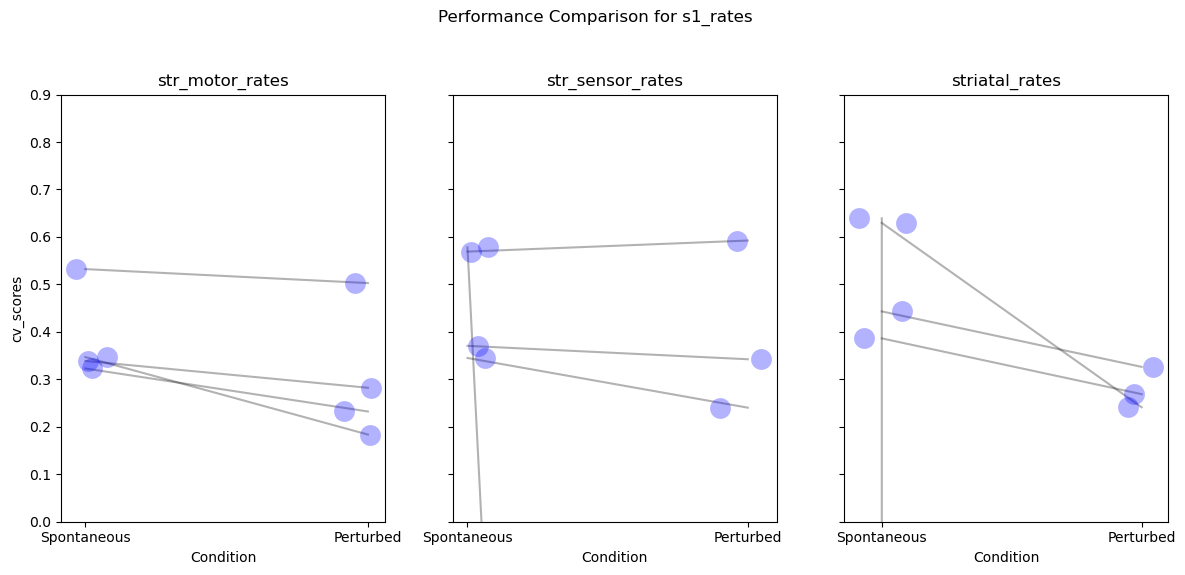

In [5]:
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor

list_of_keypoints = ['m1_rates', 's1_rates']

for region in list_of_keypoints:
    # Example input fields
    input_fields = ["str_motor_rates", "str_sensor_rates", "striatal_rates"]

    # Example dataset and mouse_id pairs
    dataset_mouse_pairs = [
        ('M030_2024_04_11_17_00', 'M030'),
        ('M030_2024_04_12_09_40', 'M030'),
        ('M027_2024_03_20_11_30', 'M027'),
        ('M033_2024_04_11_08_22', 'M033')
    ]

    # Store results
    results = {field: {'Spontaneous': [], 'Perturbed': []} for field in input_fields}
    dataset_indices = {field: {'Spontaneous': [], 'Perturbed': []} for field in input_fields}

    n_lags = 3  # Number of historical steps to include

    for dataset_index, (dataset, mouse_id) in enumerate(dataset_mouse_pairs):
        df = process_data(dataset, mouse_id)
        df_perturbed = df[df['trialType'] == 'perturbation']
        df_spontaneous = df[df['trialType'] == 'spontaneous']
        
        for input_field in input_fields:
            X_perturbed = pyd.concat_trials(df_perturbed, input_field)
            y_perturbed = pyd.concat_trials(df_perturbed, region)
            X_perturbed_lagged = create_lagged_data(X_perturbed, n_lags)
            
            X_spontaneous = pyd.concat_trials(df_spontaneous, input_field)
            y_spontaneous = pyd.concat_trials(df_spontaneous, region)
            X_spontaneous_lagged = create_lagged_data(X_spontaneous, n_lags)
            
            for X, y, label in [(X_perturbed_lagged, y_perturbed, 'Perturbed'), (X_spontaneous_lagged, y_spontaneous, 'Spontaneous')]:
                valid_idx = np.arange(n_lags, len(y))  # Exclude the first `n_lags` samples
                X_valid = X[valid_idx]
                y_valid = y[valid_idx]
                
                cv_scores = cross_val_score(LinearRegression(), X_valid, y_valid, cv=KFold(5, shuffle=True), scoring='r2')
                mean_cv_score = np.mean(cv_scores)
                results[input_field][label].append(mean_cv_score)
                dataset_indices[input_field][label].append(dataset_index)

    # Plot the performance comparison
    fig, axes = plt.subplots(nrows=1, ncols=len(input_fields), figsize=(12, 6), sharey=True)
    axes = axes.flatten()

    for i, input_field in enumerate(input_fields):
        data = pd.DataFrame({
            'cv_scores': results[input_field]['Spontaneous'] + results[input_field]['Perturbed'],
            'Condition': ['Spontaneous'] * len(results[input_field]['Spontaneous']) + ['Perturbed'] * len(results[input_field]['Perturbed']),
            'DatasetIndex': dataset_indices[input_field]['Spontaneous'] + dataset_indices[input_field]['Perturbed']
        })
        sns.stripplot(data=data, x='Condition', y='cv_scores', s=15, alpha=0.3, color='blue', ax=axes[i])
        axes[i].set_title(input_field)
        axes[i].set_ylim([0,0.9])

        # Connect points that belong to the same dataset
        for dataset_index in set(data['DatasetIndex']):
            subset = data[data['DatasetIndex'] == dataset_index]
            if len(subset) == 2:  # Ensure there are both Spontaneous and Perturbed points
                x_coords = [0, 1]  # x-coordinates for 'Spontaneous' and 'Perturbed'
                y_coords = subset['cv_scores'].values
                axes[i].plot(x_coords, y_coords, 'k-', alpha=0.3)

    plt.suptitle(f"Performance Comparison for {region}")
    plt.savefig('./probe_analysis/decode_neural_activity/striatal_to_cortical'+region+'.pdf')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()